In [38]:
"""
Plot:
    - Confusion matrices for the best models

"""




import numpy as np
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from standardizer import normate_dataset_period
import datetime as datetime
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from preprocessor import preprocessor
import os

In [45]:
from sklearn.preprocessing import MinMaxScaler
data_path = "./data/complete_smartpunch_dataset_7606punches.json"


#if data is the raw data file
if data_path.split('.')[-1]=='json':
    processor = preprocessor(filepath=data_path, data_stage='raw')
    processor.pre_process()
    period_length = 0
    sampling_rate = 0
    
#else data is already processed
else:
    processor = preprocessor(filepath=data_path, data_stage='processed')
    period_length = int( data_path.split('_')[2] )
    sampling_rate = int( data_path.split('_')[3].split('.')[0] )
        
features = processor.extract_features()
labels = processor.get_labels()
    
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)
    
norm = MinMaxScaler().fit(X_train)
    
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)



    



Feature Extraction: 100%|██████████| 20/20 [00:12<00:00,  1.64it/s]


In [49]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [72]:
#Best classifiers
svc = SVC(C=100, kernel='rbf').fit(X_train,y_train)
forest = RandomForestClassifier(criterion='entropy', max_depth=80, n_estimators=120).fit(X_train,y_train)
logreg = LogisticRegression(C=100).fit(X_train,y_train)
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=200).fit(X_train,y_train)
bayes = GaussianNB(var_smoothing=0.0001).fit(X_train,y_train)

best_clfs = [logreg, bayes, svc, adaboost, forest]

C:\Users\dante\anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\dante\AppData\Local\Temp\ipykernel_1392\1038602652.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


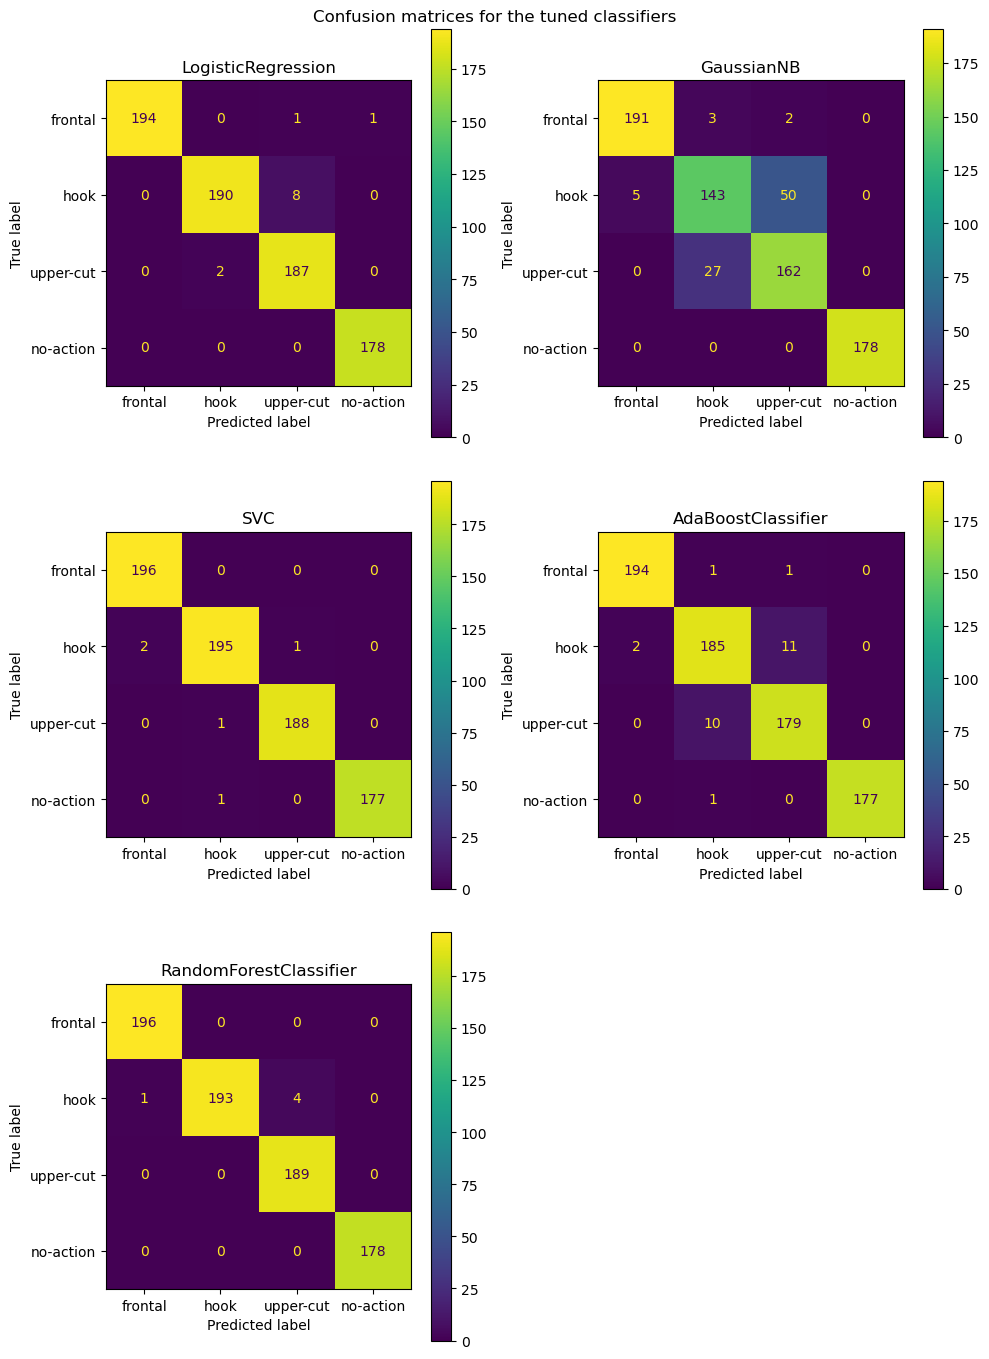

In [95]:
class_names = ['frontal', 'hook', 'upper-cut', 'no-action']

fig, ax = plt.subplots(3,2, figsize=(10,14))

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, ax=ax[0,0], display_labels=class_names)
ax[0,0].title.set_text("LogisticRegression")

ConfusionMatrixDisplay.from_estimator(bayes, X_test, y_test, ax=ax[0,1], display_labels=class_names)
ax[0,1].title.set_text("GaussianNB")

ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, ax=ax[1,0], display_labels=class_names)
ax[1,0].title.set_text("SVC")

ConfusionMatrixDisplay.from_estimator(adaboost, X_test, y_test, ax=ax[1,1], display_labels=class_names)
ax[1,1].title.set_text("AdaBoostClassifier")

ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, ax=ax[2,0], display_labels=class_names)
ax[2,0].title.set_text("RandomForestClassifier")

ax[2,1].axis('off')
    
fig.suptitle("Confusion matrices for the tuned classifiers")
fig.tight_layout()
fig.show()


In [98]:
fig.savefig("./confusion_matrices.png")